In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diamonds_dataset.csv")

# Quick overview
print(df.shape)
print(df.info())
print(df.head())


(53940, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4

In [5]:
# Separate target and features
y = df['price']
X = df.drop('price', axis=1)

# Identify categorical columns
cat_cols = X.select_dtypes(include='object').columns

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [9]:
df.duplicated().sum()

np.int64(146)

In [10]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [11]:
df.shape

(53940, 10)

In [13]:
df = df.drop_duplicates()

In [14]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [16]:
# Define the predictors (X) and target variable (y)

X = df.drop(columns=['price'])

y = df['price']

In [17]:
X.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [18]:
# Separating Categorical and Numerical Columns

X_cat = X.select_dtypes(include=['object'])
X_num = X.select_dtypes(include=['int64', 'float64'])

In [37]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y,test_size = 0.25,random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40345, 9) (40345,)
(13449, 9) (13449,)


In [19]:
X_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [20]:
X_num.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [21]:
# Rescaling numerical features
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_num_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_num),
                                 columns = minmax_scaler.get_feature_names_out(),
                                 index = X_num.index)

X_num_transformed.head()

,carat,depth,table,x,y,z
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478


In [22]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(drop="first",
                               sparse_output=False,
                               handle_unknown="ignore")

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_cat_tansformed = pd.DataFrame(onehot_encoder.fit_transform(X_cat),
                               columns=onehot_encoder.get_feature_names_out(),
                               index = X_cat.index)

print("Shape of Data before Transformation:", X_cat.shape)
print("Shape of Data after Transformation:", X_cat_tansformed.shape)

X_cat_tansformed.head()

Shape of Data before Transformation: (53794, 3)
Shape of Data after Transformation: (53794, 17)


,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
# Ordinal Encoding the categorical features
from sklearn.preprocessing import OrdinalEncoder

# Define the ordering for categorical columns (lowest to highest)
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

ordinal_encoder = OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories],
                                 handle_unknown="use_encoded_value",
                                 unknown_value=-1,
                                 encoded_missing_value=-5)

# Apply the encoding
X_cat_transformed = pd.DataFrame(ordinal_encoder.fit_transform(X_cat),
                                     columns=ordinal_encoder.get_feature_names_out(),
                                     index = X_cat.index)

X_cat_transformed.head()

,cut,color,clarity
0,4.0,5.0,1.0
1,3.0,5.0,2.0
2,1.0,5.0,4.0
3,3.0,1.0,3.0
4,1.0,0.0,1.0


In [24]:
X_transformed = pd.concat([X_num_transformed, X_cat_transformed], axis=1)

X_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,4.0,5.0,1.0
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,3.0,5.0,2.0
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,1.0,5.0,4.0
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,3.0,1.0,3.0
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,1.0,0.0,1.0


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 737.1513665933239



In [26]:
output_df = pd.DataFrame({'Actual': y_test})

output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions
1388,559,711.885773
50052,2201,3191.725837
41645,1238,1947.246411
42377,1304,2077.290626
17244,6901,9878.998209
...,...,...
44081,1554,2203.548694
23713,633,798.574773
31375,761,882.506873
21772,9836,8708.759548


In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import warnings

# Ignore all warnings (not recommended for production)
warnings.filterwarnings("ignore")

# OR: Ignore only UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

# OR: Suppress warnings from specific libraries
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Place code that triggers warnings here
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor()

regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 417.5371153133111



In [29]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions
1388,559,711.885773,572.8
50052,2201,3191.725837,2427.6
41645,1238,1947.246411,1083.4
42377,1304,2077.290626,1212.4
17244,6901,9878.998209,9642.2
...,...,...,...
44081,1554,2203.548694,1801.6
23713,633,798.574773,616.6
31375,761,882.506873,1499.8
21772,9836,8708.759548,10019.2


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 384.4103170189099



In [31]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions
1388,559,711.885773,572.8,559.0
50052,2201,3191.725837,2427.6,2351.0
41645,1238,1947.246411,1083.4,1238.0
42377,1304,2077.290626,1212.4,1334.0
17244,6901,9878.998209,9642.2,10798.0
...,...,...,...,...
44081,1554,2203.548694,1801.6,1778.0
23713,633,798.574773,616.6,633.0
31375,761,882.506873,1499.8,642.0
21772,9836,8708.759548,10019.2,9660.0


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 294.5894841038102



In [33]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
1388,559,711.885773,572.8,559.0,561.41
50052,2201,3191.725837,2427.6,2351.0,2351.22
41645,1238,1947.246411,1083.4,1238.0,1231.92
42377,1304,2077.290626,1212.4,1334.0,1220.59
17244,6901,9878.998209,9642.2,10798.0,10057.86
...,...,...,...,...,...
44081,1554,2203.548694,1801.6,1778.0,1765.41
23713,633,798.574773,616.6,633.0,614.07
31375,761,882.506873,1499.8,642.0,769.40
21772,9836,8708.759548,10019.2,9660.0,9543.78


In [34]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,559.0
1,Actual,2201.0
2,Actual,1238.0
3,Actual,1304.0
4,Actual,6901.0


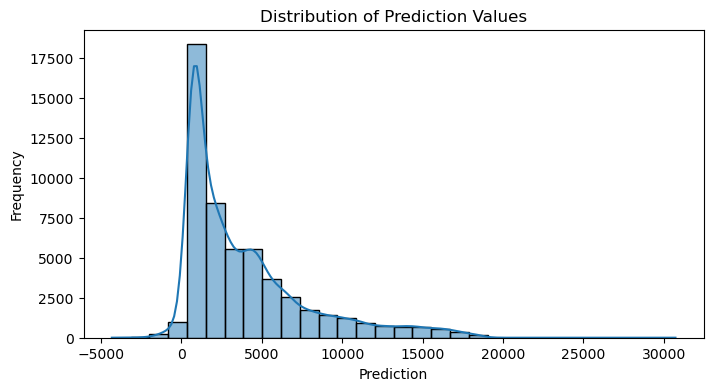

In [41]:
plt.figure(figsize=(8, 4))
sns.histplot(df_melted['Prediction'], bins=30, kde=True)
plt.title('Distribution of Prediction Values')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()



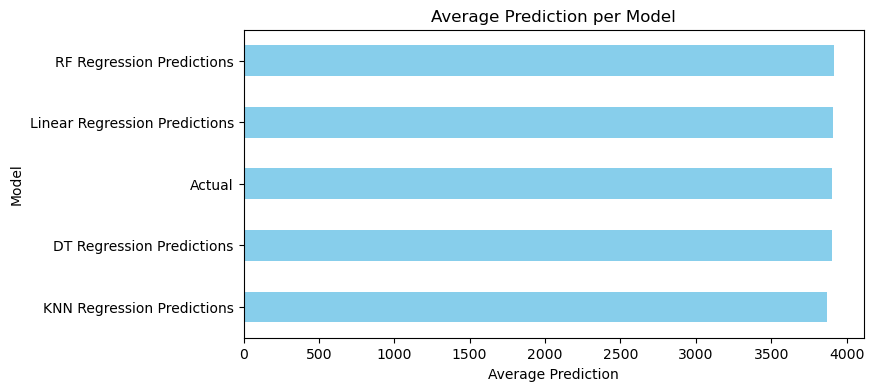

In [42]:
avg_pred = df_melted.groupby('Model')['Prediction'].mean().sort_values()
avg_pred.plot(kind='barh', figsize=(8, 4), color='skyblue')
plt.xlabel('Average Prediction')
plt.title('Average Prediction per Model')
plt.show()


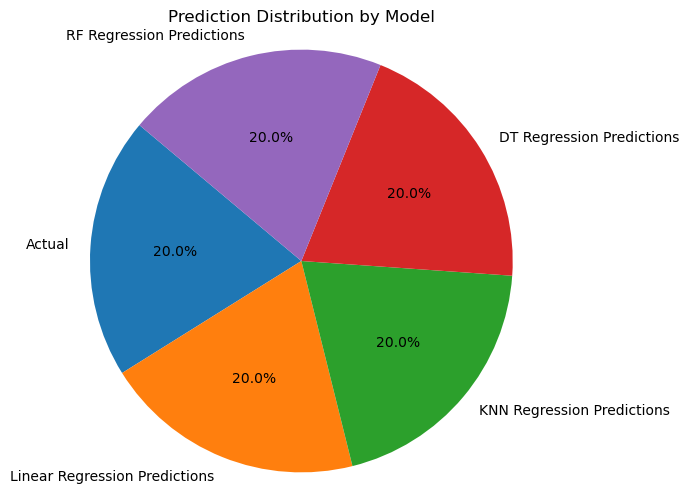

In [43]:
import matplotlib.pyplot as plt

# Count predictions per model
model_counts = df_melted['Model'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Prediction Distribution by Model')
plt.axis('equal')  # Ensures the pie is a circle
plt.show()


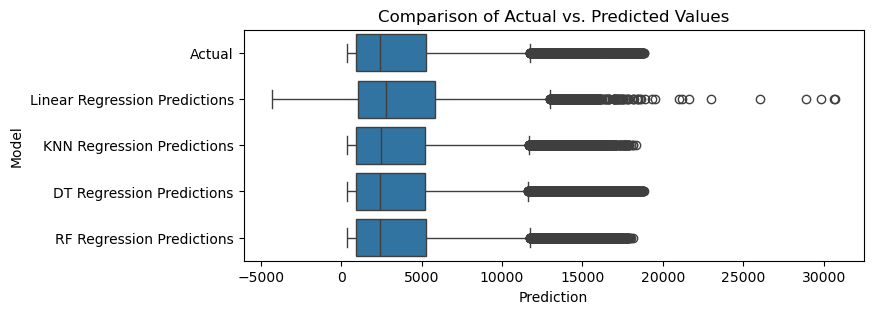

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,3))

sns.boxplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()

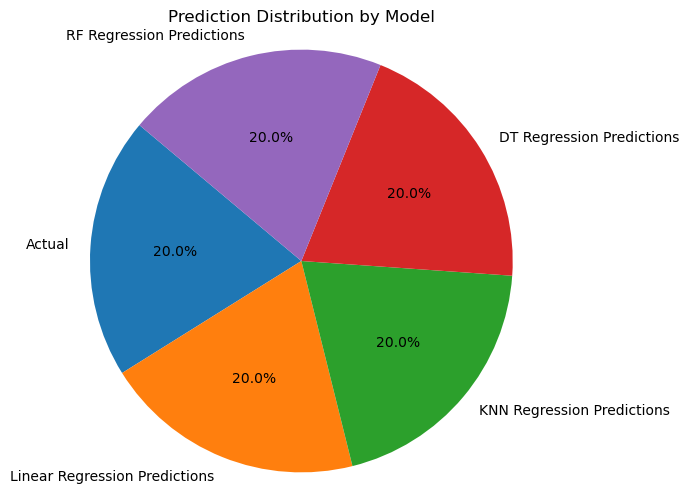

In [52]:

plt.figure(figsize=(6, 6))
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Prediction Distribution by Model')
plt.axis('equal')
plt.show()


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is cleaned and 'price' is the target
X = df.drop('price', axis=1)
y = df['price']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Define models
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_dt = DecisionTreeRegressor(random_state=42)

# Fit models
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [60]:
pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)
pred_dt = model_dt.predict(X_test)

# Create df_preds
df_preds = pd.DataFrame({
    'Actual': y_test.values,
    'Linear Regression': pred_lr,
    'Random Forest': pred_rf,
    'Decision Tree': pred_dt
})


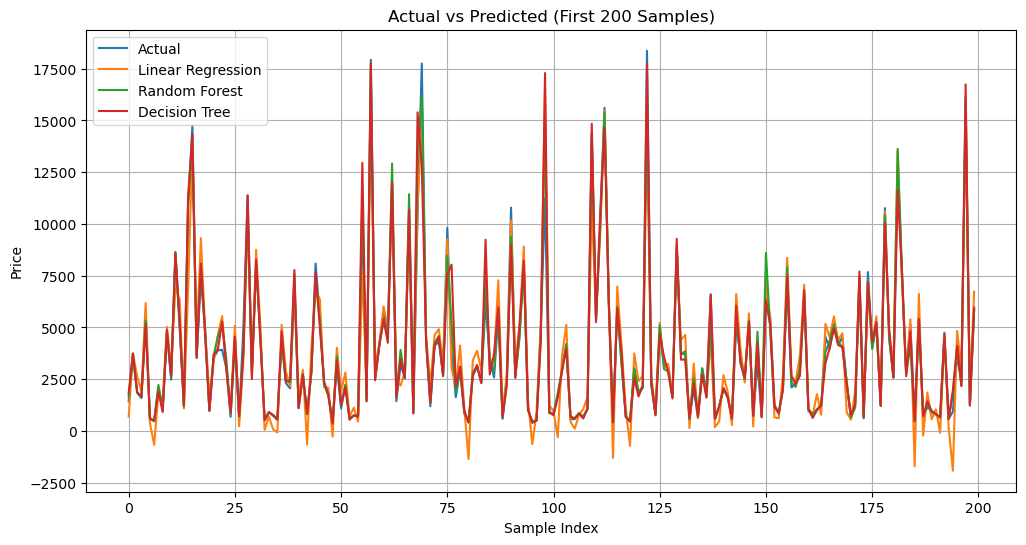

In [65]:
df_preds.iloc[:200].plot(figsize=(12, 6))
plt.title('Actual vs Predicted (First 200 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.grid(True)
plt.show()
